# Explore results after scraping results website

### User variables


In [1]:
Date = '2019-08' # yyyy-mm

### Modules and functions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display,Image

### Load results

Load auction results and data from rdw.

In [3]:
file_name = '../data/drz-data-{}.pkl'.format(Date)
print(file_name)
drz = pd.read_pickle(file_name)
file_name = '../data/rdw-data-{}.pkl'.format(Date)
print(file_name)
rdw = pd.read_pickle(file_name)

# rdw column names
#   NOTE: format changed in April 2019: RDW info is appended to auction results as extra columns in dataframe
if pd.to_datetime(Date, format='%Y-%m') >= pd.to_datetime('2019-04', format='%Y-%m'):
    rdwinfo = [c for c in rdw.columns if c.startswith('rdw_')]

# fix odometer
if pd.to_datetime(Date, format='%Y-%m') == pd.to_datetime('2019-09', format='%Y-%m'):
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch') | (rdw.OdoKM == 'volgens nap onlogisch')
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    
    idx = '2019-9-9106'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'logisch'
    rdw.loc[idx,'NAP'] = 'logisch'
    drz.loc[idx,'OdoKM'] = '251.571'
    rdw.loc[idx,'OdoKM'] = '251.571'
    
    display(drz.loc[[idx],['Title', 'OdoKM', 'NAP']])
    display(rdw.loc[[idx],['Title', 'OdoKM', 'NAP']])

    idx = '2019-9-9258'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    idx = '2019-9-9249'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    
    display(rdw.loc[sel, ['Title', 'OdoKM', 'NAP']])
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch')
    assert all(~sel)



../data/drz-data-2019-09.pkl
../data/rdw-data-2019-09.pkl


,Title,OdoKM,NAP
2019-9-9106,Kavel K1900099106,volgens NAP logisch,
2019-9-9249,Kavel K1900099249,volgens nap onlogisch,
2019-9-9258,Kavel K1900099258,volgens NAP onlogisch,


Type civic 4dr hybrid
Km-stand volgens NAP logisch
Automatic
Kenteken 04-TB-FT
Afgelezen km-stand 251.571
Benzine
Datum eerste toelating 27.06.2006
APK geldig tot 18.12.2019
De kavelomschrijving op de website wordt gemaakt op basis van
de bij Domeinen Roerende Zaken bekende gegevens.
Domeinen Roerende Zaken is geen garage- of herstelbedrijf en
controleert niet of alles naar behoren functioneert.
Categorie: Voertuigen en onderdelen 



,Title,OdoKM,NAP
2019-9-9106,Kavel K1900099106,251.571,logisch


,Title,OdoKM,NAP
2019-9-9106,Kavel K1900099106,251.571,logisch


Type vivaro 1.9di 2.7t l1h1
Kenteken 74-BB-DB
Km-stand volgens NAP onlogisch
Diesel
Datum eerste toelating 11.01.2002
Sleutel niet aanwezig
De kavelomschrijving op de website wordt gemaakt op basis van
de bij Domeinen Roerende Zaken bekende gegevens.
Domeinen Roerende Zaken is geen garage- of herstelbedrijf en
controleert niet of alles naar behoren functioneert.
Categorie: Voertuigen en onderdelen 

Type megane
Kenteken 64-XHS-5
Km-stand volgens nap onlogisch
Diesel
Datum eerste toelating 14.06.2012
Sleutel niet aanwezig
Het voertuig is voorzien van taxi-kentekenplaten.
Taxiregistratie kunt u laten aanpassen via de RDW.
Vervanging van blauwe door gele kentekenplaten
kunt u laten verrichten door de erkende bedrijven.
De kavelomschrijving op de website wordt gemaakt op basis van
de bij Domeinen Roerende Zaken bekende gegevens.
Domeinen Roerende Zaken is geen garage- of herstelbedrijf en
controleert niet of alles naar behoren functioneert.
Categorie: Voertuigen en onderdelen 



,Title,OdoKM,NAP
2019-9-9106,Kavel K1900099106,251.571,logisch
2019-9-9249,Kavel K1900099249,,onlogisch
2019-9-9258,Kavel K1900099258,,onlogisch


,Title,OdoKM,NAP
2019-9-9106,Kavel K1900099106,251.571,logisch
2019-9-9249,Kavel K1900099249,,onlogisch
2019-9-9258,Kavel K1900099258,,onlogisch


# Cheap cars with valid inspection

In [ ]:
is_cheap = (
    drz.LotType == "Personenauto"
) & (
    drz.Price<3000
) & (
    drz.Price>0
) & ~(
    (
        drz.APKdate.isnull()
    ) | (
        drz.APKdate.apply(lambda x:x == '')
    )
)

drz.loc[is_cheap,
        ["Price","ItemType","ItemBrand","Mfdate","APKdate","OdoKM"]].sort_values(by='OdoKM')

In [ ]:
if pd.to_datetime(Date, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,["rdwinfo"]])
else:
    display(rdw.loc[is_cheap,rdwinfo])

In [ ]:
if pd.to_datetime(Date, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,"rdwinfo"][0])
else:
    display(rdw.loc[is_cheap,rdwinfo].iloc[0,:])

# Pictures of lots

In [ ]:
# ix=drz.N_images.idxmax()
ix=drz.Price.idxmax(); print('Price: EUR {:g}\n\n'.format(drz.loc[ix,'Price']))
# Mfdate = drz.Mfdate.apply(lambda x: pd.to_datetime(x,format='%d.%m.%Y') if len(x)==10 else pd.np.NaN)
# ix=Mfdate.idxmin(); print('year of mf: {:s}\n\n'.format(drz.loc[ix,'Mfdate']))
# ix = '2019-2-2005' # largest km/day
# ix = '2019-2-7345' # largest km

print(ix)
for u in drz.loc[ix,'Images']:
    print(u)
    print(drz.loc[ix,'Source'])
    display(Image(url=u,width=400))
    

# Usage

How many km are driven per year or day?

### Odometer conversion

In [8]:
def odo_str2float(df):
    '''
    Convert odometer to numerical values.
    Also convert Miles to KMs.
    '''
    
    ml2km = 1.609344
    
    # substitute to nan
    df.OdoKM = df.OdoKM.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    df.OdoMLS = df.OdoMLS.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    # float
    df["OdoKM_num"] = df.OdoKM.apply(lambda x:x.replace('.','')).astype(float)
    df["OdoMLS_num"] = df.OdoMLS.apply(lambda x:x.replace('.','')).astype(float)
    # convert miles to km
    df["Odo"] = df.OdoKM_num.copy()
    chooseMls = (df.OdoKM_num.isna()) & ~(df.OdoMLS_num.isna())
    df.loc[chooseMls,"Odo"] = df.loc[chooseMls,"OdoMLS_num"].apply(float) * ml2km

In [ ]:
odo_str2float(drz)

drz[['Odo','OdoKM','OdoKM_num','OdoMLS','OdoMLS_num']]

### Dates

In [10]:
AuctDate = pd.to_datetime(drz.index[0][0:-5], format = '%Y-%m')

# serial date
drz["Mfdate_ser"] = drz.Mfdate.apply(lambda x:pd.to_datetime(x, format = '%d.%m.%Y') if (x!='') & ('-' not in x) else pd.np.NaN)

# age
drz["Age"] = (AuctDate - drz.Mfdate_ser)
drz["Age_year"] = drz.Age.apply(lambda x:x.days/365.25)

- - - -
# Continue with cars only

In [11]:
out = drz.Price.copy()
Features = drz.loc[:,["ItemBrand","ItemType","Odo","Age_year"]].copy()

In [12]:
# Drop rows
Subsel = drz.LotType == 'Personenauto'
dropIx=drz[~Subsel].index
out.drop(index=dropIx,inplace=True)
Features.drop(index=dropIx,inplace=True)

### one hot encoding brand and model

In [13]:
Dummies = pd.get_dummies(Features.ItemBrand,prefix='Brand_',drop_first=False)
Features = pd.concat([Features,Dummies],axis=1)

Features.describe()

,Odo,Age_year,Brand__ALFA ROMEO,Brand__AUDI,Brand__BENTLEY,Brand__BMW,Brand__CHEVROLET,Brand__CITROËN,Brand__DAF,Brand__FORD,...,Brand__MITSUBISHI,Brand__NISSAN,Brand__OPEL,Brand__PEUGEOT,Brand__RENAULT,Brand__SEAT,Brand__SUZUKI,Brand__TOYOTA,Brand__VOLKSWAGEN,Brand__VOLVO
count,96.000000,95.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,160531.456273,11.827746,0.010417,0.062500,0.020833,0.093750,0.010417,0.010417,0.010417,0.062500,...,0.010417,0.010417,0.052083,0.062500,0.031250,0.062500,0.010417,0.020833,0.197917,0.010417
std,86252.339119,9.672475,0.102062,0.243332,0.143576,0.293011,0.102062,0.102062,0.102062,0.243332,...,0.102062,0.102062,0.223361,0.243332,0.174906,0.243332,0.102062,0.143576,0.400520,0.102062
min,1265.000000,0.292950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87449.500000,6.045175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,175881.500000,9.177276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,217092.250000,14.583162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,418413.000000,52.134155,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plotting

In [14]:
def ecdf(data):
    x = sorted(data)
    y = pd.np.arange(0,len(x))/len(x)
    return x,y

# # example
# x,y = ecdf(km_p_day)
# plt.plot(x,y)

In [15]:
# km per day
km_p_day = Features.Odo/(Features.Age_year*365.25).fillna(0)
sel = ~(km_p_day.isna() | (km_p_day == pd.np.inf))
km_p_day = km_p_day.loc[sel]

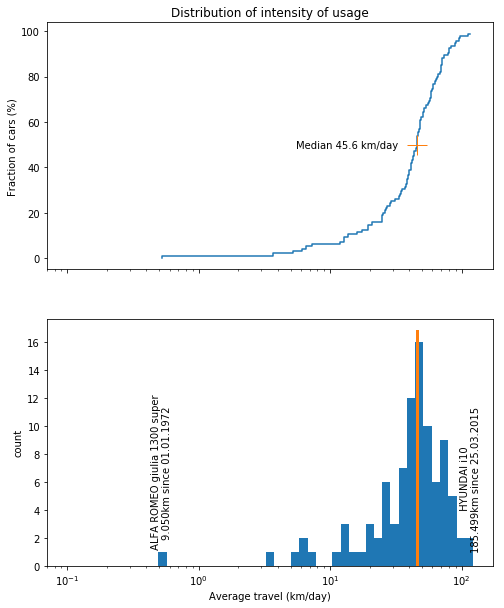

In [16]:
# Plot ecdf and hist
x,y = ecdf(km_p_day)
fig,axs = plt.subplots(ncols=1,nrows=2, figsize=[8,10],sharex=True)

# ecdf
ax = axs[0]
ax.step(x,y*100)
ax.plot(pd.np.median(x),50,'+',markersize=20)
ax.text(pd.np.median(x),50,'Median {:.1f} km/day      '.format(pd.np.median(x)),ha='right',va='center');
ax.set_title('Distribution of intensity of usage')
ax.set_ylabel('Fraction of cars (%)')

xl = axs[0].get_xlim()

# hist
ax = axs[1]
ax.hist(x,bins=pd.np.logspace(-1,pd.np.log10(xl[1]),50))
yl = axs[1].get_ylim()
ax.plot(pd.np.array([1,1])*pd.np.median(x),yl,'-',linewidth=3)
ax.set_xlabel('Average travel (km/day)')
ax.set_ylabel('count')

ax.text(
    km_p_day.min(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmin(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.text(
    km_p_day.max(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmax(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.set_xscale('log')


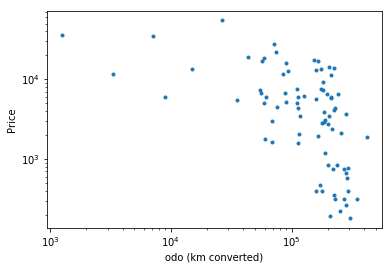

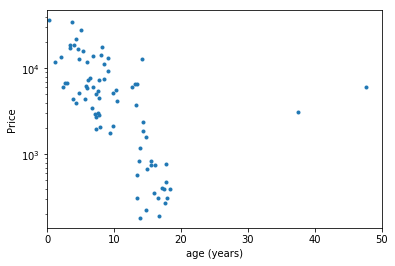

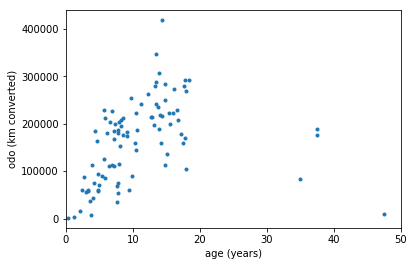

In [17]:
plt.plot(Features.Odo,out,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('odo (km converted)')
plt.ylabel('Price')

plt.figure()
plt.plot(Features.Age_year,out,'.')
plt.yscale('log')
plt.xlabel('age (years)')
plt.ylabel('Price')
plt.xlim(0,50)


plt.figure()
plt.plot(Features.Age_year,Features.Odo,'.')
plt.xlabel('age (years)')
plt.ylabel('odo (km converted)')
plt.xlim(0,50)

plt.show()



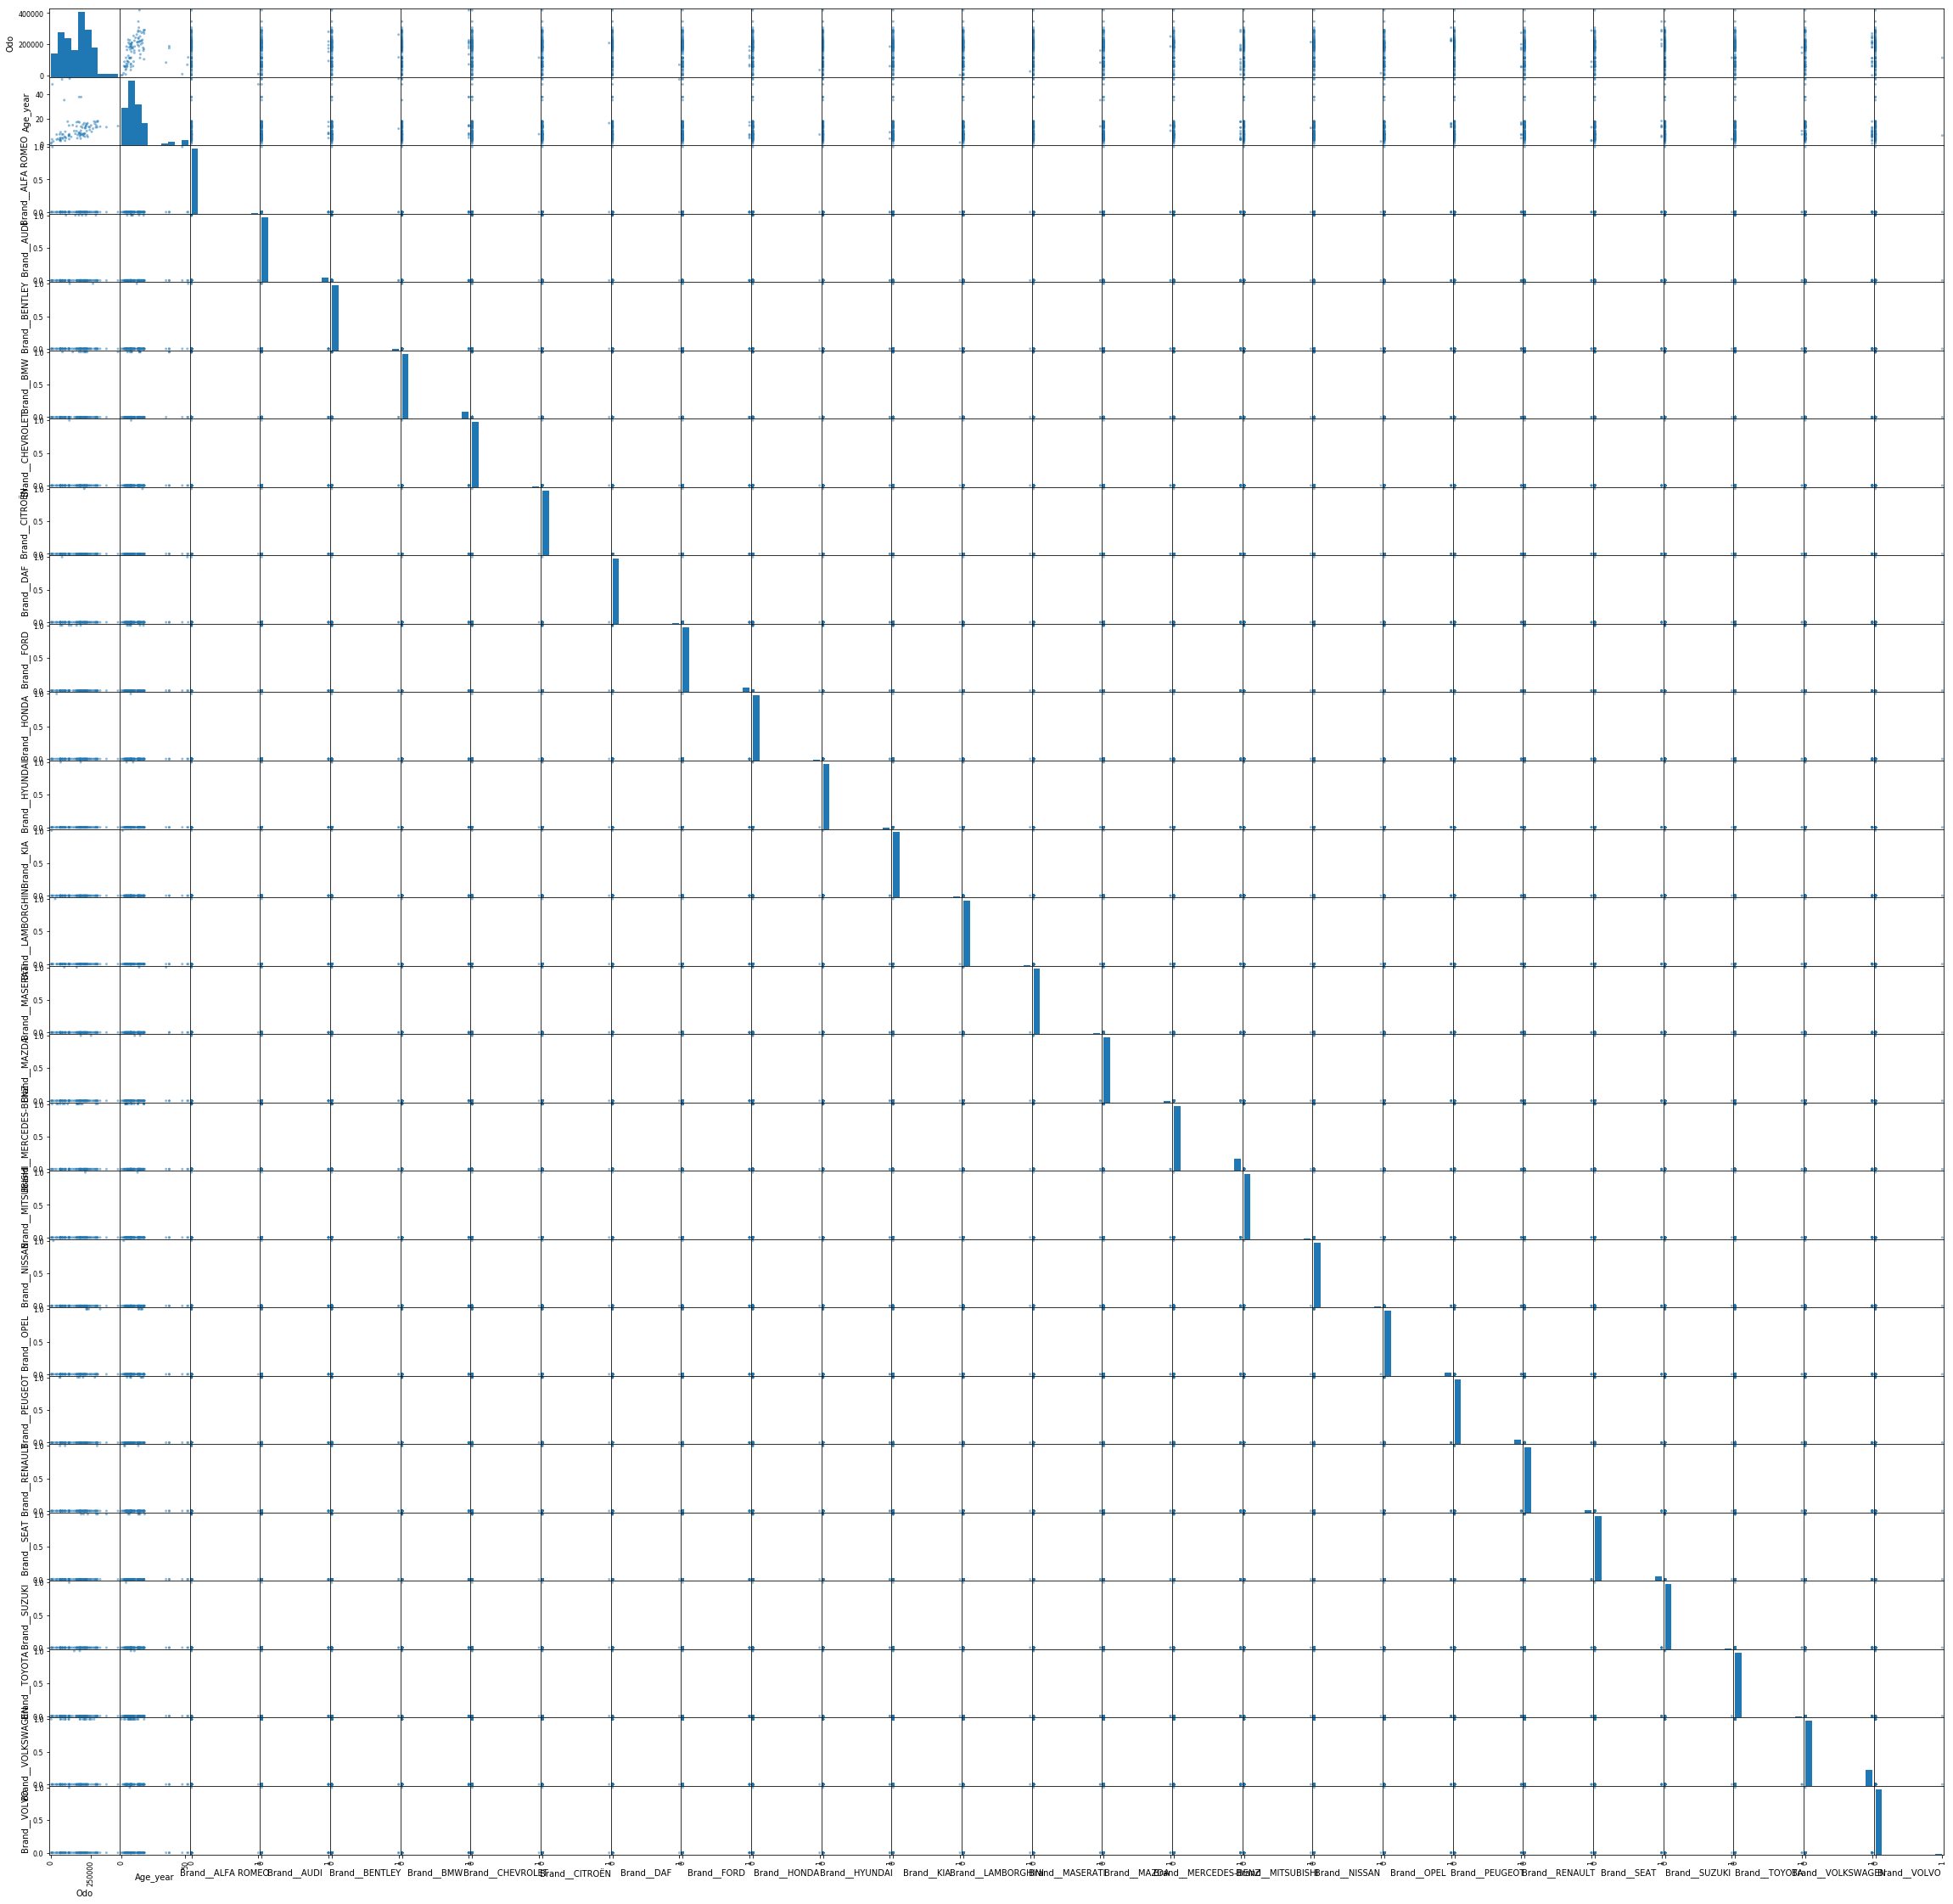

In [18]:
pd.plotting.scatter_matrix(Features,figsize=[40,40])
plt.show()